# Astropy Photometry.
## Section 1
* FITS Raw data extraction and Visualization
* Image Section Creation
## Section 2
* Photutils Star Detection through DAOStarFinder
* Circular Apertures around Sources
* Mask Creation
## Section 3
* Aperture Photometry with Photutils.Aperture
* Measuring Flux with Aperture
* Find Background Noise with Annulus
* Find Exposure time and Zeropoint of FITS image
* Calculate Stars Brightness in Magnitudes
## Section 4
* Light Curve Modeling
* Extrasolar Planet Detection

## <span style="color:white">Section 1.</span>

In [3]:
### Open data with FITS

# Astropy.io its submodule of astropy
from astropy.io import fits # open and write data, io input output
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm # logaritmic normalization

# Open FITS archive send data to variable
# ngc 1261 object observed with 606w filter. red part of the optical range
fits_file = fits.open('hst606w_ngc1261.fits')
print(fits_file) # Fits file data

In [4]:
### Image data

# We want image data, it is USUALLY contained in the primary HDU, hence 0
image_data = fits_file[0].data
print(image_data) # image pixels with brightness values associated

[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]


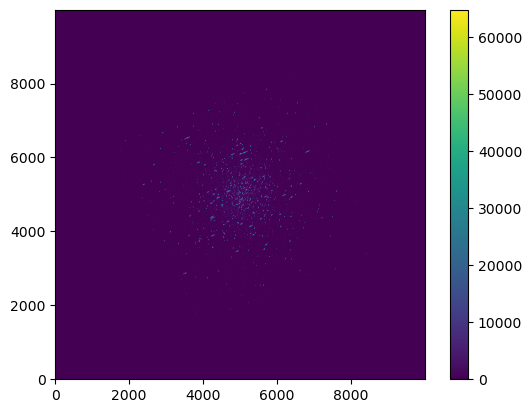

In [5]:
### Image visualization
plt.figure() # create figure

'''
- Show image using image_data
- Origin lower sets 0,0 pixel at the lower left of the plot
Image obtained not usefull, needs scaling
'''

plt.imshow(image_data, origin = 'lower')
plt.colorbar() # we include a colorbar
plt.show()

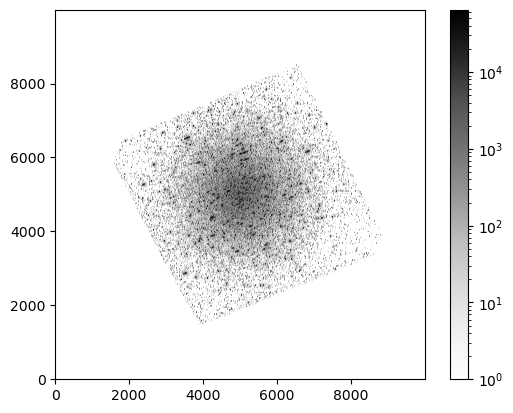

In [6]:
### Image visualization using log
plt.figure() # create figure

'''
- Show image using image_data
- Origin lower sets 0,0 pixel at the lower left of the plot
- Origin upper sets 0,0 pixel at the top left corner
- log norm. we have dynamic pixel values, this allows to see faint objects
- If we want to see raw data, normalization is not needed
- grey scale color map and plt show displays the image in a greyscale
'''

plt.imshow(image_data, origin = 'lower', norm = LogNorm(), cmap='Greys')
plt.colorbar() # we include a colorbar
plt.show()

In [7]:
### Section Creation

#  we define sections for y and then x coordinate
section1 = image_data[2250:2650 , 5350:5950]

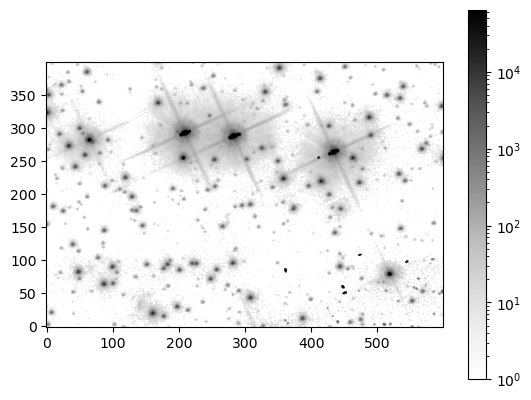

In [8]:
### Section visualization

plt.figure() # create figure
'''

- Follow the section of the image with section 1 with imshow
- Logarithmic normalization
- Hot color map and plt show displays the image
'''

plt.imshow(section1, origin = 'lower', norm = LogNorm(), cmap='Greys')
plt.colorbar()
plt.show()

## <span style="color:white">Section 2.</span>

In [9]:
### Statistics Obtention 

'''
1) Mean: average pixel value in the region, 
           Higher value indicates that in average the region is brighter

2) Median: middle pixel value when sorting pixels in ascending order
           Usefull to describe the typical pixel value in the region

3) Std: pixel values dispersion around the mean
           Higher value indicates more variability in the region brightness
'''
from astropy.stats import sigma_clipped_stats # Allows to calculate statistics
# Statistics correspond to the section image created previously
mean, median, std = sigma_clipped_stats(section1, sigma = 3.0)
print(mean, median, std)

1.5280845 0.0 8.95246


In [10]:
### Package importantion

# Star Detection algorithm, works by searching peaks that exceed threshold
# Parameters are detection treshold, size, shape and others
from photutils.detection import DAOStarFinder
'''
* Here, we search stars with fwhm of 3 pixels 
fwhm measure the star size in the image


* Threshold of 5 sigma for star detection, 
stars must have a signal 5 times above the background level 
Value its the minimum s/n ratio required for a pixel to be part of a star

'''
daofind = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std)

# table creation with sources 
sources = daofind(section1-median) # median background level its removed from the section

In [11]:
# iteration over each column in the sources table
# loop excludes the identifiers and pixel count columns as they are of no interest for now
for col in sources.colnames:
    if col not in ('id','npix'):
        sources[col].info.format = '%.2f' # two decimals will be displayed in the values

# detected sources are printed, maximum width of 76 characters
# pprint its used to get a neatly table for display
sources.pprint(max_width = 76)

'''
# OUTPUT EXPLANATION
- id: star identifier
- xcentroid: source mass center x coordinate
- ycentroid: source mass center y coordinate
- profile: light intensity distribution across the pixels in the image
- source profile: light intensity variation around the central region of the source
- Point spread function: spread of a point source across the pixels 
- sharpness: how concentrated the ligth profile is
- roundness1: how symmetric the source profile is

- sky: background level of light near the source
- peak: source peak pixel value 
- flux: total brightness of the source
- mag: source magnitude
'''

 id xcentroid ycentroid sharpness roundness1 ... sky    peak    flux   mag 
--- --------- --------- --------- ---------- ... ---- -------- ------ -----
  1    117.07      0.39      0.77      -0.04 ... 0.00   145.00   2.51 -1.00
  2    428.38      0.31      0.70      -0.83 ... 0.00   167.00   2.97 -1.18
  3    562.78      0.11      0.71      -0.11 ... 0.00   116.00   2.43 -0.96
  4    327.51      1.14      0.50      -0.08 ... 0.00   662.00  12.45 -2.74
  5    553.03      0.50      0.75       0.23 ... 0.00   751.00  14.25 -2.88
  6      2.73      3.32      0.39      -0.34 ... 0.00   581.00  11.67 -2.67
  7    103.17      3.44      0.38       0.34 ... 0.00   291.00   6.32 -2.00
  8    511.10      3.37      0.65      -0.56 ... 0.00  4065.00  80.04 -4.76
  9    477.65      3.72      0.68       0.36 ... 0.00   250.00   4.06 -1.52
 10    495.97      3.41      0.80       0.28 ... 0.00   395.00   7.24 -2.15
 11    519.77      4.02      0.69       0.08 ... 0.00   970.00  19.21 -3.21
 12    290.3

'\n# OUTPUT EXPLANATION\n- id: star identifier\n- xcentroid: source mass center x coordinate\n- ycentroid: source mass center y coordinate\n- profile: light intensity distribution across the pixels in the image\n- source profile: light intensity variation around the central region of the source\n- Point spread function: spread of a point source across the pixels \n- sharpness: how concentrated the ligth profile is\n- roundness1: how symmetric the source profile is\n\n- sky: background level of light near the source\n- peak: source peak pixel value \n- flux: total brightness of the source\n- mag: source magnitude\n'

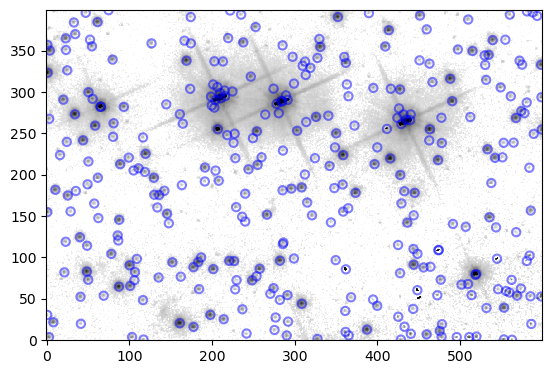

In [12]:
# Now we want to have an aperture or circle around the sources
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

# transpose interchange rows and columns of coordinates for x and y
# a 2x3 matrix(2 rows and 3 columns) gets converted to a 3x2 matrix (3 rows and 2 columns)
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))

# aperutre radius set to 5 pixels, can be smaller if wanted
apertures = CircularAperture(positions, r = 5.0) 

plt.imshow(section1, cmap = 'Greys', origin = 'lower', 
           norm = LogNorm(), interpolation = 'nearest')
# circles around sources, alpha opacity and lw the width of circles lines
apertures.plot(color = 'blue', lw = 1.5, alpha = 0.5); 

# The ; prevents extra string output and makes sure only the plot is shown.

In [13]:
### Mask Creation

# we take a section in which we dont want the star finder algorithm to apply
# array with section1 shape, data type will be boolean
mask = np.zeros(section1.shape, dtype = bool) #initially all is false

# we need to input the masks coordinates, y values first then x values
mask[260:320,40:80] = True 
mask[230:350,170:240] = True 
mask[260:340,240:320] = True
mask[250:330,420:470] = True
# all elements inside the coordinates mask will be assigned a True value

In [14]:
### Mask Sources Obtention

# sources in section 1 without noise with mask applied
sources = daofind(section1-median, mask = mask)

# extract the central coordinates of the sources in the xy axis
xpix = sources['xcentroid'] # x axis coordinates
ypix = sources['ycentroid'] # y axis coordinates

# positions have the 2d coordinates of the sources in 2 columns x and y
# transpose used to change separated arrays of coordinates
# Circular aperture needs the coordinate in a format (x,y)
positions = np.transpose((xpix,ypix)) # with this we ensure the coordinates are in nedeed format

# circular apertures around the sources with a given radius in pixels
apertures = CircularAperture(positions, r =5.0)

'\nApertures usefull to:\n* Obtain flux within the aperture\n* Isolate objects within 5 pixels\n* Minimize background and sky noise\n* uniformity in the objects. \n* Delimit flux to the object, take external contributions away\n'

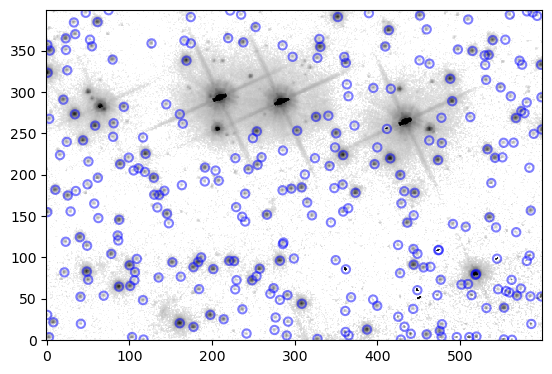

In [15]:
# Plotting Sources with Mask
plt.imshow(section1, cmap = 'Greys', norm = LogNorm(), origin='lower', interpolation = 'nearest')
# we plot the circular apertures around the sources
apertures.plot(color = 'blue', lw = 1.5, alpha = 0.5)

'''
Apertures usefull to:
* Obtain flux within the aperture
* Isolate objects within 5 pixels
* Minimize background and sky noise
* uniformity in the objects. 
* Delimit flux to the object, take external contributions away
'''
# Mask covers cluster with stars that we dont wanted to have in the image

## <span style="color:white">Section 3.</span>

In [16]:
### Aperture Photometry

# We obtained apertures before hand, the array is in the variable apertures
# We need to form an annulus around the stars, this is a disk with inner and outer radius

from photutils.aperture import (CircularAnnulus, 
CircularAperture, ApertureStats, aperture_photometry)

# Function Circular Annulus applied around the positions coords
# Inner and Outer radius set arbitrarily in pixels quantities
annulus_aperture = CircularAnnulus(positions, r_in= 10, r_out= 15)

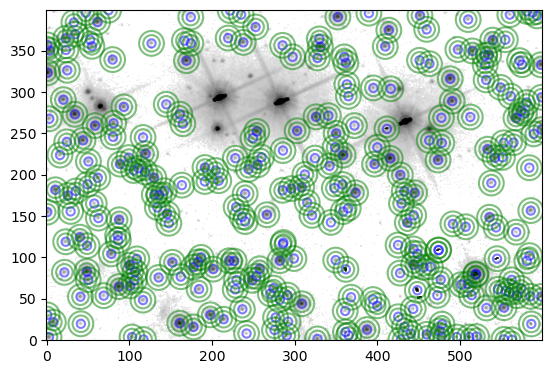

'\n# Background noise \n Unwanted signal that is not from an astronomical source, need to be substracted\n Obtained through the difference between the outer and inner annulus radius.\n\n# Annulus\n Ring shaped region Used to estimate the background noise near a source\n\n- Inner radius: set a few pixels larger than the aperture to avoid contamination from source\n\n- Outer radius: defines the background conditions near the source.\n'

In [17]:
### Plotting Annulus

plt.figure() # create figure where plot will be
# Plot original image 
plt.imshow(section1, cmap = 'Greys', norm = LogNorm(), origin='lower')
# add circular apertures around the sources, mask included
apertures.plot(color ='blue', lw=1.5, alpha = 0.5)
# add new elements of annulus in green color
annulus_aperture.plot(color ='green', lw = 1.5, alpha = 0.5)

plt.show()

'''
# Background noise 
 Unwanted signal that is not from an astronomical source, need to be substracted
 Obtained through the difference between the outer and inner annulus radius.

# Annulus
 Ring shaped region Used to estimate the background noise near a source

- Inner radius: set a few pixels larger than the aperture to avoid contamination from source

- Outer radius: defines the background conditions near the source.
'''

In [18]:
### Calculating Background Noise from the Annulus Aperture

# aperturestats obtains mean, meadian, std of pixel values within the annulus 
aperstats = ApertureStats(section1, annulus_aperture)
bkg_mean = aperstats.mean 

# Apertures are circles, but images are made of square pixels.
# If the aperture only partially covers a pixel (the circle cuts through part of the pixel), 
# Then, only the fraction of the pixel that is inside the aperture contributes to the measurement

#Overlap tells how much of a pixel is covered by aperture
aperture_area = apertures.area_overlap(section1) 

# background is the mean value by the aperture area
total_bkg = bkg_mean*aperture_area

In [19]:
### Photometric Measurements

# This creates a table of photometric measurements for the objects
# Specifically, coordinates, aperture sum and total background noise
star_data = aperture_photometry(section1, apertures)
star_data['total_bkg'] = total_bkg # We add column containing the background noise

for col in star_data.colnames: 
     star_data[col].info.format = '%.8g'
# print photometric table
star_data.pprint()

 id  xcenter   ycenter   aperture_sum total_bkg 
       pix       pix                            
--- --------- ---------- ------------ ----------
  1  117.0729 0.38839155    710.84233  400.81225
  2 428.38388 0.30625622    945.45659  2017.5584
  3 562.77649 0.11454681    166.37386  14.089614
  4 327.50794  1.1435325    6241.6337  258.11564
  5 553.03499 0.50015611    2372.9432 -143.03034
  6 2.7306458  3.3161044    6725.3586 -17.303514
  7 103.16878  3.4435555    2935.1965 -99.968888
  8 511.10464  3.3743036    18299.081 -36.838817
  9  477.6451  3.7211929    2347.5202  488.79266
 10 495.96884  3.4096442    1065.1486  1804.0909
 11 519.76988  4.0175592    3305.4467 -74.586651
 12 290.30435  5.2547846    2594.8324 -92.543039
 13 365.24367  5.3366581    2667.2426   164.6607
 14 241.69499  7.6666071    205.40093 -342.61969
 15 440.40994  7.3317247    10110.837  253.57141
 16 459.52648  6.6689598    9455.3414  356.99917
 17 361.36775  9.5619662    2633.0133  113.47393
 18   475.373  10.82

## Transform Flux to Orders of Magnitude
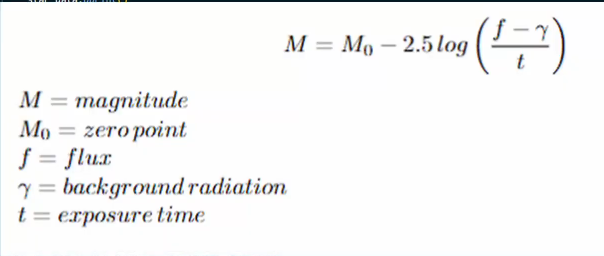



**Parameters:**
1) M = Apparent Magnitude, brigtness observed from the earth
2) M0 = zero point magnitude, known reference flux that represents magnitude 0 
3) f = Raw flux measured of the object (source and background)
4) Y = background flux radiation 
5) t = exposure time, time in which the observation was made


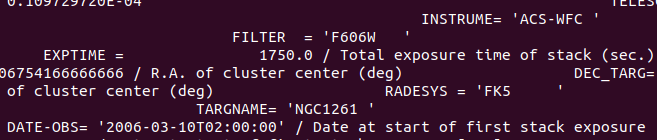

### Obtaining Zero Point

from acstools import acszpt # library used to obtain zeropoint
* Zeropoint depends on the day, instrument, filter and time of the observation
* This Information is in the header of the FITS file, we look for:
* DATE, INSTRUME, FILTER, EXPTIME
* To enter the header we just go to the terminal and input more 'hst606w_ngc1261.fits'

In [20]:
### Obtaining zeropoint
from acstools import acszpt # library used to obtain zeropoint

date = '2006-03-10' # Zp varies with time, is important to input date
instrument = 'WFC' # Wide Field Camera used in the Hubble Space Telescope
filter = 'F606W' # Optical Filter

q = acszpt.Query(date = date, detector = instrument) # query on the zeorpoint with set parameter
zpt_table = q.fetch() # obtain zeropoint for multiple filters, send it to table

# zeropoint for our filter specified by the filter variable
q_filter = acszpt.Query(date = date, detector = instrument, filt = filter) 

filter_zpt = q_filter.fetch() # zeropoint for our filter

print(filter_zpt) # our zero point is seen in ABmag

Filter PHOTLAM             PHOTFLAM            STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom electron cm2) mag(ST)   mag   mag(AB)
------ -------- ----------------------------- ------- ------- -------
 F606W   5919.7                    7.7915e-20  26.671  26.415  26.501


In [21]:
# for the 606w filter we obtain ABmag which is the zeropoint
zeropoint = 26.501 # AB magnitude
extime = 1750 # in seconds, info obtained through the header

import math
magnitudes = [] # empty list where magnitudes will go
for line in star_data: # for each star we calculate magnitude using previous equation
    magnitudes.append(zeropoint-(2.5*math.log10(abs(line[3]-line[4])/extime)))

# we create another column in star_data where the magnitudes will be
star_data['magnitude'] = magnitudes
star_data.pprint(max_lines = -1, max_width = -1) #print as many lines as it takes

 id  xcenter    ycenter   aperture_sum total_bkg      magnitude     
       pix        pix                                               
--- ---------- ---------- ------------ ---------- ------------------
  1   117.0729 0.38839155    710.84233  400.81225  28.38008551028678
  2  428.38388 0.30625622    945.45659  2017.5584 27.033005076056085
  3  562.77649 0.11454681    166.37386  14.089614 29.151957707173764
  4  327.50794  1.1435325    6241.6337  258.11564  25.16620361601928
  5  553.03499 0.50015611    2372.9432 -143.03034 26.106829960484927
  6  2.7306458  3.3161044    6725.3586 -17.303514  25.03651663712294
  7  103.16878  3.4435555    2935.1965 -99.968888 25.903139230980145
  8  511.10464  3.3743036    18299.081 -36.838817 23.950338355597133
  9   477.6451  3.7211929    2347.5202  488.79266 26.435555809429733
 10  495.96884  3.4096442    1065.1486  1804.0909 27.437068725898353
 11  519.76988  4.0175592    3305.4467 -74.586651 25.786292670475238
 12  290.30435  5.2547846    2594.

## <span style="color:white">Section 4.</span>

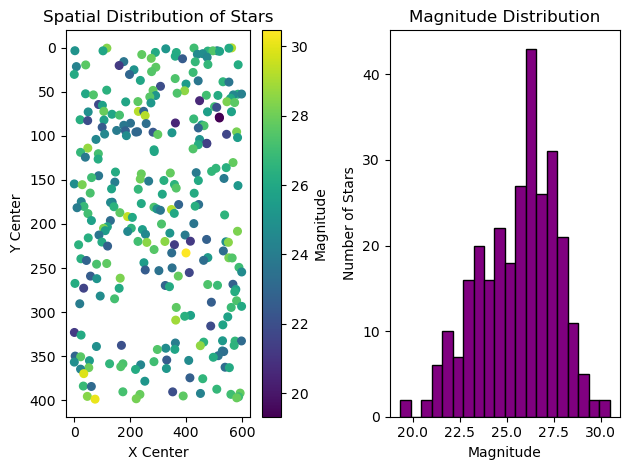

In [22]:
### Useful plots

plt.subplot(1,2,1)
# spatial distribution of Stars
plt.scatter(star_data['xcenter'], star_data['ycenter'], 
            c=star_data['magnitude'], cmap='viridis', s=30)
plt.colorbar(label='Magnitude')
plt.xlabel('X Center')
plt.ylabel('Y Center')
plt.title('Spatial Distribution of Stars')
plt.gca().invert_yaxis()  # Invert Y axis for standard astronomical image orientation

plt.subplot(1,2,2)
plt.hist(star_data['magnitude'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Number of Stars')
plt.title('Magnitude Distribution')
plt.tight_layout()

In [23]:
### Light Curve
# Needs magnitudes and measurements over time.
# We have different fits image taken through time
# We download data from here https://www.astro.louisville.edu/software/astroimagej/examples/

In [24]:
from astropy.io import fits
fits_files = [] # empty list where files go
for i in range(40, 100, 1):
    fits_files.append(f'WASP-12b/WASP-12b_000{i}_bsdf.fits') 
    # list with fits files from 40 to 99

for i in range(100, 270, 1):
    fits_files.append(f'WASP-12b/WASP-12b_00{i}_bsdf.fits') 
    # list with fits files from 100 to 269


print(fits_files[0:5]) # this gives array with each fits file

['WASP-12b/WASP-12b_00040_bsdf.fits', 'WASP-12b/WASP-12b_00041_bsdf.fits', 'WASP-12b/WASP-12b_00042_bsdf.fits', 'WASP-12b/WASP-12b_00043_bsdf.fits', 'WASP-12b/WASP-12b_00044_bsdf.fits']


In [25]:
fits_data = [] #  we retrieve image data for each fits file

for fits_file in fits_files:
    file_data = fits.open(fits_file) # open data for each fit file
    image_data = file_data[0].data # image data in the primary HDU
    fits_data.append(image_data) # all image data to fits_data list

print(fits_data[0:5]) # we print first rows to check 

[array([[1240, 1253, 1250, ..., 1204, 1260, 1205],
       [1274, 1221, 1207, ..., 1177, 1171, 1203],
       [1244, 1217, 1227, ..., 1217, 1254, 1193],
       ...,
       [1233, 1245, 1188, ..., 1228, 1254, 1221],
       [1254, 1197, 1260, ..., 1183, 1264, 1238],
       [1273, 1231, 1236, ..., 1229, 1237, 1213]], dtype=uint16), array([[1289, 1211, 1242, ..., 1213, 1209, 1172],
       [1235, 1264, 1251, ..., 1201, 1221, 1198],
       [1233, 1217, 1203, ..., 1193, 1187, 1208],
       ...,
       [1249, 1215, 1240, ..., 1228, 1191, 1235],
       [1293, 1262, 1247, ..., 1169, 1178, 1203],
       [1270, 1216, 1204, ..., 1207, 1151, 1213]], dtype=uint16), array([[1323, 1211, 1250, ..., 1209, 1195, 1185],
       [1262, 1231, 1219, ..., 1178, 1130, 1148],
       [1296, 1278, 1228, ..., 1136, 1201, 1216],
       ...,
       [1279, 1194, 1236, ..., 1195, 1188, 1221],
       [1245, 1192, 1173, ..., 1196, 1208, 1185],
       [1261, 1272, 1218, ..., 1216, 1167, 1219]], dtype=uint16), array([[1318, 1

In [27]:
# the position of the star we want to model have to be search by DAOSFinder or other method
position =  [2401.93, 2086.15]
aperture = CircularAperture(position, r = 10)
star_data = []

for file in fits_data: #include aperture photometry data to star_data
    star_data.append(aperture_photometry(file, aperture)['aperture_sum'])
    
print(star_data[0:5])

[<Column name='aperture_sum' dtype='float64' length=1>
1378985.3649930172, <Column name='aperture_sum' dtype='float64' length=1>
1166119.1710529984, <Column name='aperture_sum' dtype='float64' length=1>
922570.5368153333, <Column name='aperture_sum' dtype='float64' length=1>
1038883.4002751422, <Column name='aperture_sum' dtype='float64' length=1>
1220957.0887624202]


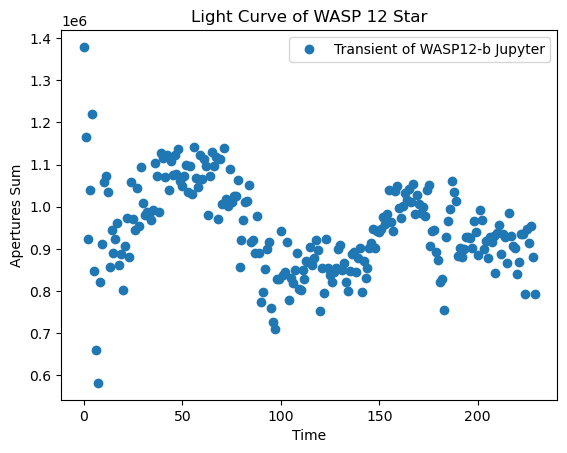

In [29]:
### Light Curve
import matplotlib.pyplot as plt
plt.plot(star_data,'o')
plt.ylabel('Apertures Sum')
plt.xlabel('Time')
plt.title('Light Curve of WASP 12 Star')
plt.legend(['Transient of WASP12-b Jupyter'])
plt.show()